In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('./data/retailmax.csv')

In [ ]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
type(scaled_features)

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [ ]:
clusters

In [ ]:
len(clusters)

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [ ]:
clusters

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [ ]:
clusters

In [ ]:
df

In [ ]:
df['clasificación'] = clusters
df

In [ ]:
df['clasificación'].value_counts()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='clasificación', palette='Set1')
plt.title('Clusters de clientes')
plt.show()

In [ ]:
    # Función para calcular la Suma de Cuadrados Dentro del Cluster (WCSS)
def calcular_wcss(datos):
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(datos)
        wcss.append(kmeans.inertia_)
    return wcss

# Calcular el WCSS para diferentes números de clusters
wcss = calcular_wcss(scaled_features)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# --- Imports
import warnings; warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Estilo plots
sns.set(style="whitegrid")

# --- Carga de datos
df = pd.read_csv("./data/retailmax.csv")
df.columns = [c.strip() for c in df.columns]  # por si vienen espacios

# --- Selección de features numéricas
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

# --- Escalado
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Chequeo rápido
print("shape scaled_features:", scaled_features.shape)
df.head(3)

shape scaled_features: (200, 3)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


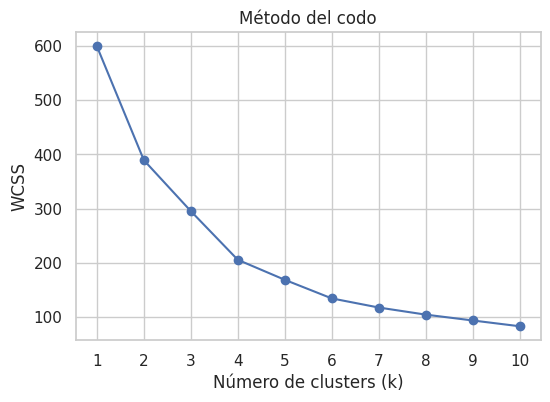

In [10]:
def calcular_wcss(datos):
    wcss = []
    for n in range(1, 11):
        km = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=42)
        km.fit(datos)
        wcss.append(km.inertia_)
    return wcss

wcss = calcular_wcss(scaled_features)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.show()

In [11]:
k_opt = 5  # <-- ajusta si tu codo sugiere otro
kmeans = KMeans(n_clusters=k_opt, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters  # pegamos al df original

print(df['Cluster'].value_counts().sort_index())
df.sample(5, random_state=42)

Cluster
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
95,96,Male,24,60,52,1
15,16,Male,22,20,79,1
30,31,Male,60,30,4,0
158,159,Male,34,78,1,3
128,129,Male,59,71,11,3


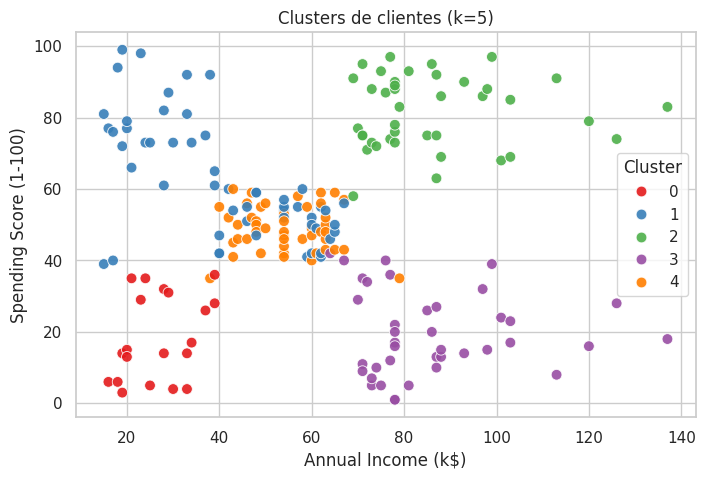

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=60,
    alpha=0.9
)
plt.title(f'Clusters de clientes (k={k_opt})')
plt.show()

In [13]:
sil = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette score (k={k_opt}): {sil:.3f}")

Silhouette score (k=5): 0.417


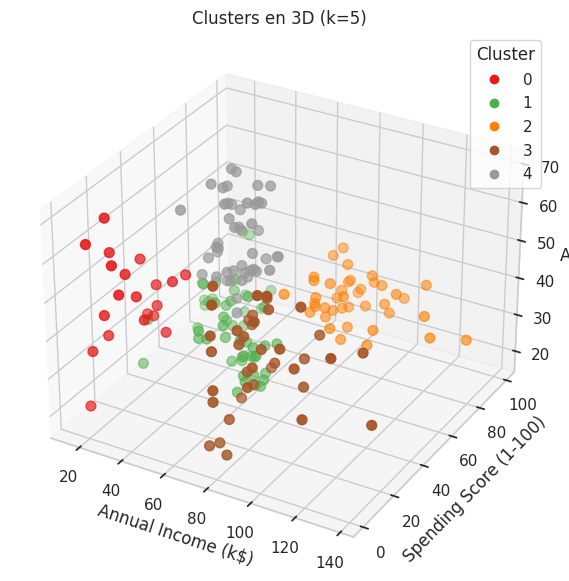

In [14]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    df['Age'],
    c=df['Cluster'],
    cmap='Set1',
    s=50
)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title(f'Clusters en 3D (k={k_opt})')
ax.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

In [15]:
cluster_analysis = (
    df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]
    .groupby('Cluster').mean().round(2)
)
display(cluster_analysis)

for c in cluster_analysis.index:
    print(f"Cluster {c}:")
    print(f" - Edad media: {cluster_analysis.loc[c, 'Age']:.2f}")
    print(f" - Ingreso anual medio: {cluster_analysis.loc[c, 'Annual Income (k$)']:.2f}k$")
    print(f" - Spending Score medio: {cluster_analysis.loc[c, 'Spending Score (1-100)']:.2f}")
    print("="*40)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,46.25,26.75,18.35
1,25.19,41.09,62.24
2,32.88,86.10,81.53
3,39.87,86.10,19.36
4,55.64,54.38,48.85


Cluster 0:
 - Edad media: 46.25
 - Ingreso anual medio: 26.75k$
 - Spending Score medio: 18.35
Cluster 1:
 - Edad media: 25.19
 - Ingreso anual medio: 41.09k$
 - Spending Score medio: 62.24
Cluster 2:
 - Edad media: 32.88
 - Ingreso anual medio: 86.10k$
 - Spending Score medio: 81.53
Cluster 3:
 - Edad media: 39.87
 - Ingreso anual medio: 86.10k$
 - Spending Score medio: 19.36
Cluster 4:
 - Edad media: 55.64
 - Ingreso anual medio: 54.38k$
 - Spending Score medio: 48.85


In [16]:
# map sin perder el texto original
df['Gender_num'] = df['Gender'].map({'Male': 0, 'Female': 1})

extended_features = df[['Gender_num', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler_ext = StandardScaler()
scaled_extended = scaler_ext.fit_transform(extended_features)

kmeans_ext = KMeans(n_clusters=k_opt, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans_ext.fit_predict(scaled_extended)  # sustituimos por clusters extendidos

extended_cluster_analysis = (
    df[['Gender_num','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']]
    .groupby('Cluster').mean().round(2)
)
display(extended_cluster_analysis)

# % mujeres por cluster
gender_pct = (
    df.groupby('Cluster')['Gender_num'].mean().mul(100).round(2)
)
print("\n% Mujeres por cluster:")
print(gender_pct)

for c in extended_cluster_analysis.index:
    print(f"\nCluster {c}:")
    print(f" - Edad prom.: {extended_cluster_analysis.loc[c,'Age']:.2f}")
    print(f" - Ingreso prom.: {extended_cluster_analysis.loc[c,'Annual Income (k$)']:.2f}k$")
    print(f" - Spending prom.: {extended_cluster_analysis.loc[c,'Spending Score (1-100)']:.2f}")
    print(f" - % Mujeres: {gender_pct.loc[c]:.2f}%")


,Gender_num,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.54,32.69,86.54,82.13
1,0.55,36.48,89.52,18.00
2,1.00,49.81,49.23,40.07
3,0.59,24.91,39.72,61.20
4,0.00,55.71,53.69,36.77



% Mujeres por cluster:
Cluster
0     53.85
1     55.17
2    100.00
3     59.26
4      0.00
Name: Gender_num, dtype: float64

Cluster 0:
 - Edad prom.: 32.69
 - Ingreso prom.: 86.54k$
 - Spending prom.: 82.13
 - % Mujeres: 53.85%

Cluster 1:
 - Edad prom.: 36.48
 - Ingreso prom.: 89.52k$
 - Spending prom.: 18.00
 - % Mujeres: 55.17%

Cluster 2:
 - Edad prom.: 49.81
 - Ingreso prom.: 49.23k$
 - Spending prom.: 40.07
 - % Mujeres: 100.00%

Cluster 3:
 - Edad prom.: 24.91
 - Ingreso prom.: 39.72k$
 - Spending prom.: 61.20
 - % Mujeres: 59.26%

Cluster 4:
 - Edad prom.: 55.71
 - Ingreso prom.: 53.69k$
 - Spending prom.: 36.77
 - % Mujeres: 0.00%
